# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [17]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
#Your code here
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

## 2. Create a standard logistic regression model

In [74]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)

lm = logreg.fit(X_train, y_train)
lm

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 3. Write a function to calculate the precision

In [66]:
def precision(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return tp/float(tp+fp)
                

## 4. Write a function to calculate the recall

In [65]:
def recall(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return tp/float(tp+fn)


## 5. Write a function to calculate the accuracy

In [58]:
def accuracy(y_hat, y):
    trues = sum(y_hat==y)

    return trues/len(y)
        

## 6. Write a function to calculate the F1-score

In [71]:
def f1_score(y_hat,y):
    r = recall(y_hat,y)
    p = precision(y_hat,y)
    return 2*(r * p)/(r + p)

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the training and the test set

In [75]:
# calculate y_hat
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [76]:
#train metrics
print("Precision train: ",precision(y_hat_train, y_train))
print("Recall train: ",recall(y_hat_train, y_train))
print("Accuracy train: ",accuracy(y_hat_train, y_train))
print("F1-score train: ",f1_score(y_hat_train, y_train))

Precision train:  0.8396946564885496
Recall train:  0.9016393442622951
Accuracy train:  0.8546255506607929
F1-score train:  0.8695652173913043


In [77]:
#test metrics
print("Precision test: ",precision(y_hat_test, y_test))
print("Recall test: ",recall(y_hat_test, y_test))
print("Accuracy test: ",accuracy(y_hat_test, y_test))
print("F1-score test: ",f1_score(y_hat_test, y_test))

Precision test:  0.8125
Recall test:  0.9069767441860465
Accuracy test:  0.8289473684210527
F1-score test:  0.8571428571428572


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [79]:
from sklearn.metrics import classification_report
#Train
print(classification_report(y_hat_train, y_train))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84        96
          1       0.90      0.84      0.87       131

avg / total       0.86      0.85      0.86       227



In [80]:
#Test
print(classification_report(y_hat_test, y_test))

             precision    recall  f1-score   support

          0       0.73      0.86      0.79        28
          1       0.91      0.81      0.86        48

avg / total       0.84      0.83      0.83        76



In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Training F1-Score: ',f1_score(y_hat_train,y_train))

Training Precision:  0.9016393442622951
Training Recall:  0.8396946564885496
Training Accuracy:  0.8546255506607929
Training F1-Score:  0.8695652173913043


In [82]:
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Testing Precision:  0.9069767441860465
Testing Recall:  0.8125
Testing Accuracy:  0.8289473684210527
Testing F1-Score:  0.8571428571428572


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different train set sizes. What do you notice?

In [85]:
import  matplotlib.pyplot as plt
%matplotlib inline

In [92]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100.0) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

# 6 lines of code here
    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
    training_F1.append(f1_score(y_hat_train,y_train))
    testing_F1.append(f1_score(y_hat_test,y_test))
    

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, testing and training accuracy in the third one, and testing and training f1-score in the fourth one.

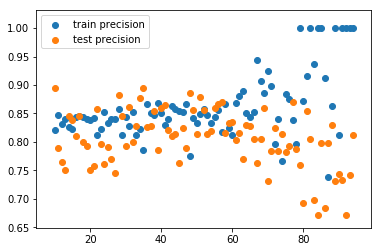

In [93]:
# code for test and train precision
plt.scatter(range(10,95), training_Precision, label='train precision')
plt.scatter(range(10,95), testing_Precision, label='test precision')
plt.legend();

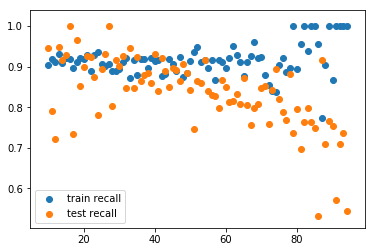

In [94]:
# code for test and train recall
plt.scatter(range(10,95), training_Recall, label='train recall')
plt.scatter(range(10,95), testing_Recall, label='test recall')
plt.legend();

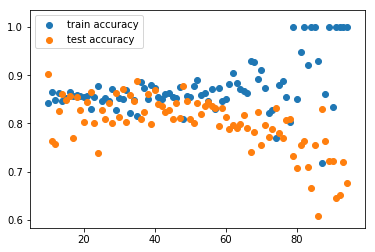

In [95]:
# code for test and train accuracy
plt.scatter(range(10,95), training_Accuracy, label='train accuracy')
plt.scatter(range(10,95), testing_Accuracy, label='test accuracy')
plt.legend();

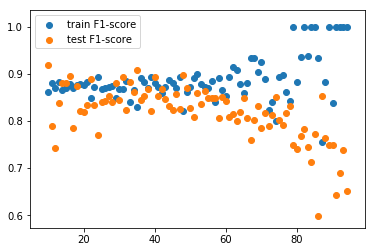

In [96]:
# code for test and train F1-score
plt.scatter(range(10,95), training_F1, label='train F1-score')
plt.scatter(range(10,95), testing_F1, label='test F1-score')
plt.legend();

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.